Single(simple) Exponential smoothing uses a weighted moving average with exponentially decreasing weights.

Double Exponential Smoothing(DWA) is also called as Holts Double Exponential Smoothing.Double Exponential Smoothing is extended form of Simple Exponential Smoothing. Double Exponential Smoothing technique is used for forecasting with trending data.It has level and trend but it does not have seasonality

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesis1/Data Training.xlsx
/kaggle/input/tesis1/salus72.csv


In [8]:
header_list = ["jumlah_ikan","kurs_rp"]
df = pd.read_csv("../input/tesis1/salus72.csv",header = None,names = header_list)

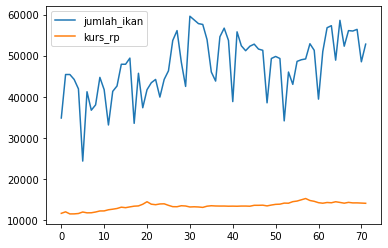

In [9]:
df.plot()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   jumlah_ikan  72 non-null     int64
 1   kurs_rp      72 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [11]:
df.drop('kurs_rp',axis = 1, inplace = True)

In [12]:
len(df)

72

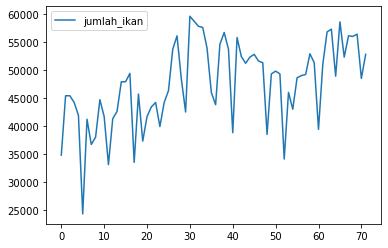

In [13]:
df.plot()

In [14]:
df[['jumlah_ikan']]

,jumlah_ikan
0,34800
1,45400
2,45400
3,44200
4,41900
...,...
67,56100
68,56000
69,56400
70,48500


In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing 
import matplotlib.pyplot as plt

In [16]:
ses = SimpleExpSmoothing(df).fit(smoothing_level=0.6,optimized=False)
exps = ses.fittedvalues

In [17]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [18]:
dblExp = Holt(df).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
dexps = dblExp.fittedvalues

In [19]:
df['exps'] = exps
df['desps'] = dexps

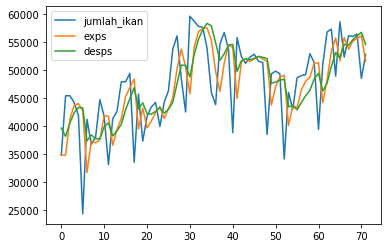

In [20]:
df.plot()

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
def prettyprint(result):
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [23]:
resultRaw = adfuller(df.jumlah_ikan)
prettyprint(resultRaw)

ADF Statistic: -1.630528
p-value: 0.467214
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594


In [24]:
resultSingleExp = adfuller(df.exps)
prettyprint(resultSingleExp)

ADF Statistic: -1.830127
p-value: 0.365611
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594


In [25]:
resultDoubleExp = adfuller(df.desps)
prettyprint(resultDoubleExp)

ADF Statistic: -2.184676
p-value: 0.211854
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594


In [26]:
df['stationary'] = df.jumlah_ikan.diff()

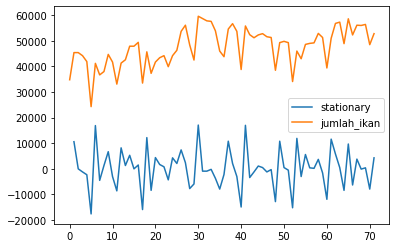

In [27]:
df[['stationary','jumlah_ikan']].plot()

In [28]:
df=df.reset_index()

In [29]:
df.columns

Index(['index', 'jumlah_ikan', 'exps', 'desps', 'stationary'], dtype='object')

In [30]:
df.columns = ['period', 'jumlah_ikan', 'exps', 'desps', 'stationary']

In [31]:
len(df)*0.8

57.6

In [77]:
df = pd.read_csv("../input/tesis1/salus72.csv",header = None,names = header_list)

In [78]:
dfMLP = df
dfMLP['ikanmin1'] = df['jumlah_ikan'].shift(1)
dfMLP['ikanmin2'] = df['jumlah_ikan'].shift(2)
dfMLP['ikanmin3'] = df['jumlah_ikan'].shift(3)
dfMLP['ikanmin4'] = df['jumlah_ikan'].shift(4)
dfMLP['ikanmin5'] = df['jumlah_ikan'].shift(5)
dfMLP['ikanmin6'] = df['jumlah_ikan'].shift(6)

dfMLP['kursmin1'] = df['kurs_rp'].shift(1)
dfMLP['kursmin2'] = df['kurs_rp'].shift(2)
dfMLP['kursmin3'] = df['kurs_rp'].shift(3)
dfMLP['kursmin4'] = df['kurs_rp'].shift(4)
dfMLP['kursmin5'] = df['kurs_rp'].shift(5)
dfMLP['kursmin6'] = df['kurs_rp'].shift(6)


dfMLP.dropna(how='any', inplace=True)
dfMLP

,jumlah_ikan,kurs_rp,ikanmin1,ikanmin2,ikanmin3,ikanmin4,ikanmin5,ikanmin6,kursmin1,kursmin2,kursmin3,kursmin4,kursmin5,kursmin6
6,41200,11689,24300.0,41900.0,44200.0,45400.0,45400.0,34800.0,11893.0,11526.0,11436.0,11427.0,11936.0,11568.0
7,36700,11707,41200.0,24300.0,41900.0,44200.0,45400.0,45400.0,11689.0,11893.0,11526.0,11436.0,11427.0,11936.0
8,38000,11891,36700.0,41200.0,24300.0,41900.0,44200.0,45400.0,11707.0,11689.0,11893.0,11526.0,11436.0,11427.0
9,44700,12145,38000.0,36700.0,41200.0,24300.0,41900.0,44200.0,11891.0,11707.0,11689.0,11893.0,11526.0,11436.0
10,41700,12158,44700.0,38000.0,36700.0,41200.0,24300.0,41900.0,12145.0,11891.0,11707.0,11689.0,11893.0,11526.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,56100,14242,52300.0,58600.0,48900.0,57300.0,56800.0,51000.0,14044.0,14227.0,14393.0,14143.0,14211.0,14035.0
68,56000,14111,56100.0,52300.0,58600.0,48900.0,57300.0,56800.0,14242.0,14044.0,14227.0,14393.0,14143.0,14211.0
69,56400,14118,56000.0,56100.0,52300.0,58600.0,48900.0,57300.0,14111.0,14242.0,14044.0,14227.0,14393.0,14143.0
70,48500,14069,56400.0,56000.0,56100.0,52300.0,58600.0,48900.0,14118.0,14111.0,14242.0,14044.0,14227.0,14393.0


In [79]:
len(dfMLP)*0.8

52.800000000000004

In [80]:
X = dfMLP.drop('jumlah_ikan',axis=1)
y = dfMLP['jumlah_ikan']

In [81]:
Xtrain,Xtest,ytrain,ytest = X[:52],X[52:],y[:52],y[52:]

In [82]:
from sklearn.neural_network import MLPRegressor

In [90]:
mlp = MLPRegressor()
mlp.fit(Xtrain,ytrain)

MLPRegressor()

In [91]:
yhat = mlp.predict(Xtest)

In [92]:
yhat

array([51187.03760089, 57972.1249536 , 56720.3372614 , 59870.15740794,
       58704.72112576, 55103.58020438, 58073.06513582, 65373.08022682,
       59494.15120015, 60810.79595457, 62993.51267254, 66054.59934228,
       60619.46646266, 66370.399346  ])

In [93]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [94]:
mean_absolute_error(ytest,yhat)

7776.128091734322

In [95]:
mean_squared_error(ytest,yhat)


79407310.9160533

In [96]:
mean_absolute_percentage_error(ytest,yhat)

15.539269102385447

In [97]:
res = ytest.to_frame()

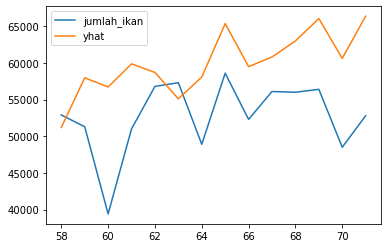

In [98]:
res['yhat'] = yhat
res.plot()

In [99]:
res

,jumlah_ikan,yhat
58,52900,51187.037601
59,51300,57972.124954
60,39400,56720.337261
61,51000,59870.157408
62,56800,58704.721126
63,57300,55103.580204
64,48900,58073.065136
65,58600,65373.080227
66,52300,59494.151200
67,56100,60810.795955


In [100]:
dfnew = df[['jumlah_ikan']]
dfnew = dfnew.append(res,ignore_index = True)

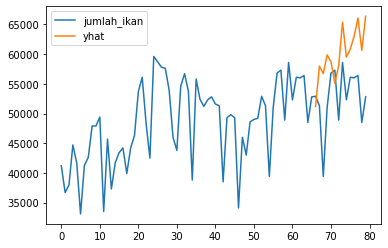

In [101]:
dfnew.plot()

In [102]:
dfMLP.tail(1)

,jumlah_ikan,kurs_rp,ikanmin1,ikanmin2,ikanmin3,ikanmin4,ikanmin5,ikanmin6,kursmin1,kursmin2,kursmin3,kursmin4,kursmin5,kursmin6
71,52800,14017,48500.0,56400.0,56000.0,56100.0,52300.0,58600.0,14069.0,14118.0,14111.0,14242.0,14044.0,14227.0


In [103]:
dfMLP.tail(1).to_numpy()[:,1:]

array([[14017., 48500., 56400., 56000., 56100., 52300., 58600., 14069.,
        14118., 14111., 14242., 14044., 14227.]])

In [104]:
bulan71 = mlp.predict(dfMLP.tail(1).to_numpy()[:,1:])
bulan71

array([66370.399346])

In [105]:
bulan72 = mlp.predict(np.array([[66370.399346,14017., 48500., 56400., 56000., 56100., 52300., 58600., 14069.,
        14118., 14111., 14242., 14044.]]))
bulan72

array([58177.63606736])

In [106]:
bulan73 = mlp.predict(np.array([[58177.63606736,66370.399346,14017., 48500., 56400., 56000., 56100., 52300., 58600., 14069.,
        14118., 14111., 14242.]]))
bulan73

array([50356.29513516])

In [73]:
bulan73 = mlp.predict(np.array([[50356.29513516,58177.63606736,66370.399346,14017., 48500., 56400., 56000., 56100., 52300., 58600., 14069.,
        14118., 14111.]]))
bulan73

array([63976.80860436])

=========================== end ====================================

In [ ]:
Xtest

In [ ]:
yhat

In [ ]:
ytest

In [ ]:
from matplotlib.pyplot import plot

In [ ]:
Xtrain

In [ ]:
ytrain

In [ ]:
Xtest

In [ ]:
np.array(ytest)

In [ ]:
plot(ytest)

In [ ]:
y

In [ ]:
ytest

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [ ]:
mean_absolute_error(ytest,yhat)

In [ ]:
mean_absolute_error(ytest,yhat)
mean_squared_error(ytest,yhat)
mean_absolute_percentage_error(ytest,yhat)

In [ ]:
mean_absolute_percentage_error(ytest,yhat)

In [ ]:
df.tail()

In [ ]:
tahun2019 = [*range(72,84)]
tahun2019

In [ ]:
dfpredict = df 
dfpredict['period'] = df['period'].append(pd.Series(tahun2019,index=tahun2019))

In [ ]:
df2019 = pd.Series(tahun2019,index=tahun2019).to_frame()
df2019.columns=["period"]
df2019

In [ ]:
df2019['jumlah_ikan'] = yhat
df2019

In [ ]:
len(df)

In [ ]:
# Simple Exponential Smoothing
fit1 = ExponentialSmoothing(df).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')
# plot
fcast1.plot(marker='o', color='blue', legend=True)
fit1.fittedvalues.plot(marker='o',  color='blue')



fit2 = ExponentialSmoothing(df).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(12).rename(r'$\alpha=0.6$')
# plot
fcast2.plot(marker='o', color='red', legend=True)
fit2.fittedvalues.plot(marker='o', color='red')


fit3 = ExponentialSmoothing(df).fit()
fcast3 = fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
# plot
fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='green')

plt.show()

In [ ]:
fit2.fittedvalues

In [ ]:
#prediksi taun depan

In [ ]:
dfMLP.tail()